In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
df = pd.read_csv('medical_clean.csv', index_col=0)
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [14]:
selected_vars = ['TotalCharge', 'Additional_charges', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Age', 'Initial_days']
selected_df = df[selected_vars].copy()

In [15]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(selected_df), columns=selected_vars)

In [16]:
scaled_df.to_csv('D212_Task2_Data.csv', index=False)

In [17]:
pca_full = PCA()
pca_result = pca_full.fit_transform(scaled_df)

In [18]:
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [19]:
# Each row defines displacement from the mean.
components=pca_full.components_
print(components)

[[ 0.70224886  0.0846426  -0.02067727 -0.00224458 -0.00731178 -0.01978597
   0.08456922  0.70117949]
 [-0.07897883  0.70144087 -0.01907977  0.0204805   0.01591383  0.03147952
   0.70120537 -0.08959007]
 [ 0.0068319  -0.02531843 -0.49517728  0.61234473 -0.08177878  0.60952951
  -0.03031358  0.0035749 ]
 [ 0.0142197  -0.00761137  0.43452856  0.3775718   0.81327193  0.08173459
  -0.01048619  0.0127518 ]
 [ 0.0163133   0.00862048  0.67181666 -0.1344476  -0.36058523  0.63241401
  -0.00268984  0.01641203]
 [-0.00466154  0.00549726  0.33741335  0.68115027 -0.44896521 -0.46941924
   0.01407926 -0.00349038]
 [-0.03128392 -0.70615995  0.00240077 -0.00221055  0.00125819  0.01031172
   0.70656523  0.03172447]
 [ 0.70646548 -0.03675543  0.00128279 -0.00149946 -0.00111174 -0.00159666
   0.02627388 -0.7062985 ]]


Why reduce dimensionality?
1. Dataset will be less complex.
2. Require less disk space.
3. Require less computation time.
4. Have lower chance of model overfitting. 

In [20]:
#Instantiate and fit and transform PCA model
model = PCA(n_components=scaled_df.shape[1], random_state=42)
model.fit_transform(scaled_df)

matrix = pd.DataFrame(model.components_.T, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7', 'PC8'], index=scaled_df.columns)
matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
TotalCharge,0.702249,-0.078979,0.006832,0.014220,0.016313,-0.004662,-0.031284,0.706465
Additional_charges,0.084643,0.701441,-0.025318,-0.007611,0.008620,0.005497,-0.706160,-0.036755
Income,-0.020677,-0.019080,-0.495177,0.434529,0.671817,0.337413,0.002401,0.001283
VitD_levels,-0.002245,0.020480,0.612345,0.377572,-0.134448,0.681150,-0.002211,-0.001499
Doc_visits,-0.007312,0.015914,-0.081779,0.813272,-0.360585,-0.448965,0.001258,-0.001112
Full_meals_eaten,-0.019786,0.031480,0.609530,0.081735,0.632414,-0.469419,0.010312,-0.001597
Age,0.084569,0.701205,-0.030314,-0.010486,-0.002690,0.014079,0.706565,0.026274
Initial_days,0.701179,-0.089590,0.003575,0.012752,0.016412,-0.003490,0.031724,-0.706298


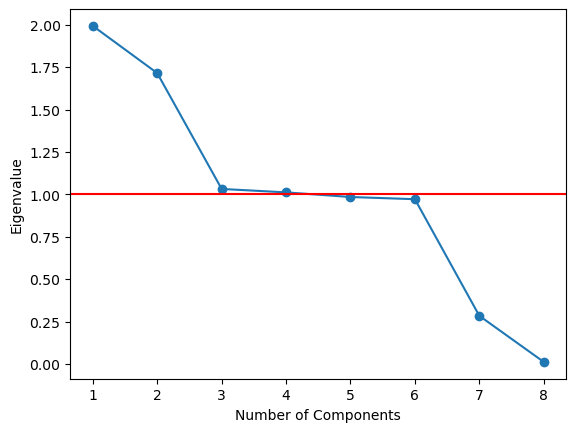

In [21]:
# Extract eigenvalues
eigenvalues =  pd.Series(model.explained_variance_, index=range(1,9))

# Create scree plot with reference line at eigenvalue = 1 to determine PCs based on Kaiser Rule
plt.plot(eigenvalues, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r')
plt.show();

PCA features are in decreasing order of variance. Assumes the low variance features are "noise" and high variance features are informative.

The eigenvalues are extracted from the model's explained_variance_ attribute and visualized in a scree plot. Using the Kaiser rule, PCs with eigenvalues greater than one are kept, and anything below is dropped. From the visualization and the list of eigenvalues, the first 4 PCs are kept as they contain eigenvalues of greater than one.

In [22]:
# Print eigenvalues to determine cutoff
eigenvalues

1    1.992777
2    1.714462
3    1.031571
4    1.011398
5    0.984068
6    0.971174
7    0.283632
8    0.011717
dtype: float64

Listed are the variance and variance ratios of the significant principal components. The variance ratios are expressed in percentages, such as for PC1, which captures the most variance at 24.90%.

In [23]:
pd.Series(model.explained_variance_[:4], index=['PC1','PC2','PC3', 'PC4'])

PC1    1.992777
PC2    1.714462
PC3    1.031571
PC4    1.011398
dtype: float64

In [24]:
var_ratio = pd.Series(model.explained_variance_ratio_[:4]*100, index=['PC1','PC2','PC3', 'PC4'])
var_ratio

PC1    24.907216
PC2    21.428628
PC3    12.893352
PC4    12.641216
dtype: float64

The total variance captured by the first 4 principal components is 71.87%.

In [25]:
var_ratio.values.sum()

71.8704123557255